### 1. Propriedades dos Retornos

Imports Básicos

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

Séries temporais de ativos financeiros são conjuntos de dados que representam o comportamento de preços, volumes de negociação, retornos ou outras características de um ativo financeiro ao longo do tempo. Esses ativos podem incluir ações, títulos, commodities, moedas ou qualquer outro instrumento financeiro negociado em um mercado. Elas são de interesse essencial para quem atua no mercado financeiro, pois descrevem o comportamento de um ativo ao longo do tempo, como sua têndencia, volatilidade, etc. Para os exemplos desse notebook, usarei de exemplo o preço de fechamento do IBOV. Abaixo, como utilitário, deixo o código de como salvar os preços a partir da API do Yahoo Finance.

In [50]:
import yfinance

your_filepath = ""
df_ibov = yfinance.download('^BVSP')
# df_ibov.to_excel(fr'{your_filepath}\FinancialEconometrics\Risk Modelling\Data\Ibov.xlsx'

[*********************100%%**********************]  1 of 1 completed


Abaixo, realizo um slice do DataFrame para considerar apenas o preço de fechamento e crio uma visualização temporal do preço de fechamento do IBOV com o horizonte de dados desde 2001. A série expressa neste formato é chamada de **série em nível**.

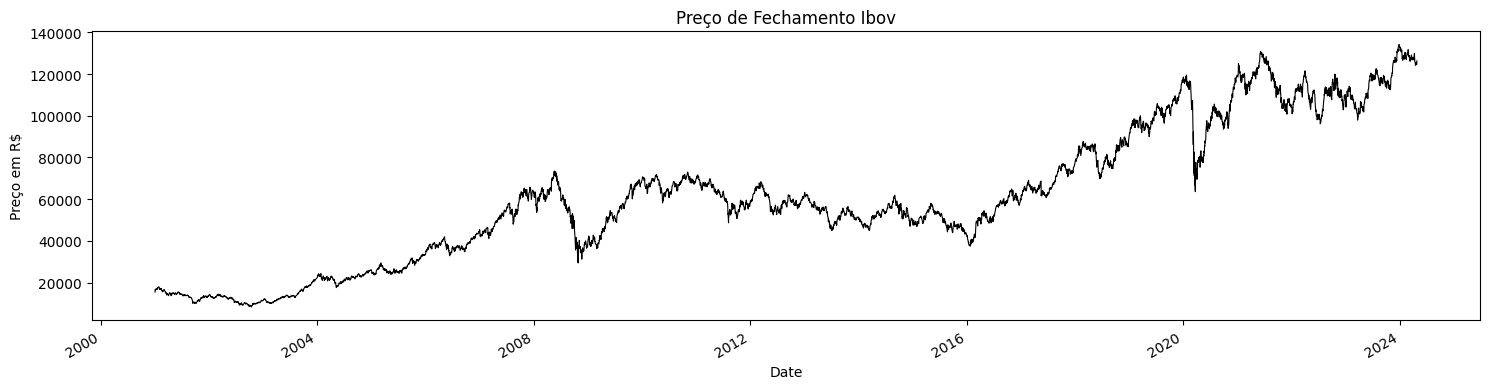

In [6]:
ibov = df_ibov['Close']['2001':]
ibov.plot(figsize=(15,4), lw=.8, c='k')
plt.title('Preço de Fechamento Ibov')
plt.ylabel('Preço em R$')
plt.tight_layout()

Com essa visualização é possível observar que houveram momentos de queda expressiva como em 2008 (devido a crise do subprime) e em 2020 devido a pandemia. Se for de interesse do cientista é possível modelar essa série diretamente no intuito de realizar previsões futuras ou inferência sob possíveis fatores que afetam a dinâmica. Isto no entanto está de fora do escopo desse estudo. Séries em nível em geral são não-estacionárias (covâriancia-estacionárias) e por isso são difíceis de serem modeladas. Como o interesse desta série é analisar a volatilidade ou risco de um ativo, a opção indicada é transformar a série em nível para a série de **retornos**.

Retornos nada mais são que a variação no rendimento de um ativo ao longo do tempo. Por exemplo, suponha que um investidor comprou uma ação a R$100 no instante t = 0 e que esse ativo subiu para R$110 e R$95 nos períodos consecutivos. Os retornos são a representação da variação do valor investido no tempo, ou seja, em t=1 o retorno foi positivo e em t=2 o retorno foi negativo.  Neste contexto existem duas possíveis formulações para o cálculo dos retornos: simples (aritméticos) e logarítmicos. Abaixo segue uma breve explicação sobre cada formulação e algumas vantagens ao se utilizar a forma em log.

Retornos simples ($R_t^S$):
$$
R_t^S = \frac{P_t}{P_{t-1}} -1
$$

Retornos Logarítmicos ($R_t^L$):
$$
R_t^S = \ln(\frac{P_t}{P_{t-1}}) = \ln(P_t) - \ln(P_{t-1})
$$

Observações:
- Retornos Simples medem a variação absoluta no preço do ativo.
- Retornos Logarítmicos ou Log Retornos medem a variação relativa no preço do ativo.

Vantagens do log retorno:
- Os retornos logarítmicos podem ser interpretados como retornos continuamente compostos.
- Ao considerar retornos de vários períodos, o log retorno períodos é simplesmente a soma dos log retornos. 

No decorrer desse estudo, usarei o log retorno como a forma padrão no cálculo dos retornos e irei me referir a ele simplesmente como retorno ($r_t$).


A seguir decorre o cálculo dos retornos e visualização do IBOV

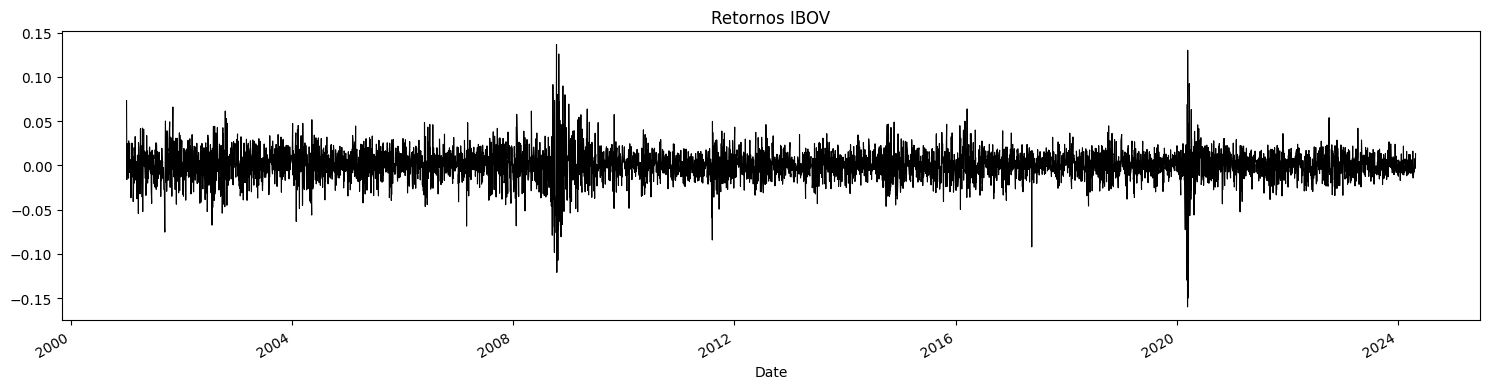

In [51]:
ribov = np.log(ibov).diff().dropna()
def plot_ribov():
    ribov.plot(figsize=(15,4), lw=.8, c='k')
    plt.title('Retornos IBOV')
    plt.tight_layout()
plot_ribov()

Pela visualização do Gráfico decorrem imeadiamente alguns fatos. Primeiro a média ($\bar{r}$) dos retornos é (muito próxima) de 0. Podemos realizar esse cálculo de forma empírica, segue:

In [52]:
print('Média dos Retornos do IBOV:', ribov.mean().round(4))

Média dos Retornos do IBOV: 0.0004


Por isso tem-se que:

$$ E({r}) = 0$$

Além disso outro fato importante pode ser observado, existem agrupamentos onde os retornos parecem ter maior volatilidade. Particularmente as quedas em 2008 e 2020, como visto no gráfico em nível, estão associados a maior volatiladidade dos retornos do IBOV. Este fenômeno de agrupamento é chamado de *cluster de volatilidade* e indica algo muito importante: **a volatilidade é variante no tempo**. 

Inicialmente para medir a volatilidade da série, utilizaremos a variância ($\sigma^2$) ou desvio padrão ($\sigma$) não-condicional dos retornos.

In [53]:
print('Variância dos Retornos do IBOV:', ribov.var().round(4))
print('Desvio Padrão dos Retornos do IBOV:', ribov.std().round(4))

Variância dos Retornos do IBOV: 0.0003
Desvio Padrão dos Retornos do IBOV: 0.0173


Como veremos, essa medida não é a mais adequada pois a variância ou volatilidade dos retornos é dependente no tempo. Isso ocorre justamente porque os períodos ou instantes da série com alta volatilidade tendem a permanecer assim. Uma maneira de representarmos a variância como variante no tempo é elevarmos os retornos do ativo ao quadrado $r_t^2$. Podemos derivar o por que desta transformação rapidamente. Dada a fórmula da Variância com o operador da esperança:

$$Var(r_t) = E(r_t - \bar{r}_t)^2$$
$$\Rightarrow (E(r_t) - E(r_t))^2$$
$$\text{Como } E(r_t) = 0 $$
$$Var(r_t) = E(r_t)^2$$


Esta forma de representar a variância de um ativo é chamada algumas vezes de **variância realizada**. Abaixo plota-se o gráfico dessa transformação que ilustra muito bem o efeito de persistência da variância dos retornos. 

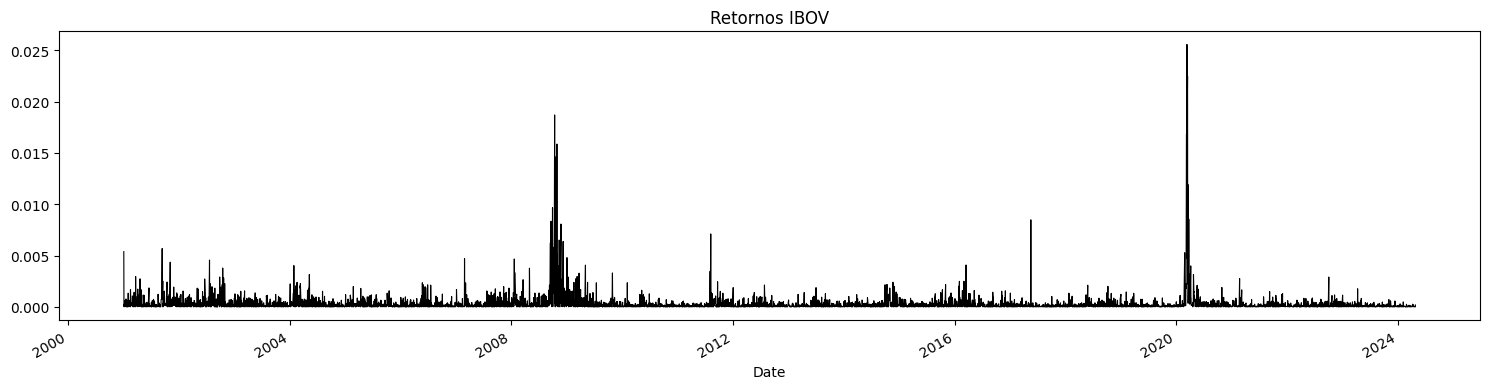

In [54]:
ribov2 = ribov**2
ribov2.plot(figsize=(15,4), lw=.8, c='k')
plt.title('Retornos IBOV')
plt.tight_layout()

Para obtermos uma medida mais direta da volatilidade, tomaremos a raiz quadrada da série de retornos ao quadrado para obter o desvio-padrão realizado ou **volatilidade** realizada.

$$\sigma_t = \sqrt{r_t^2}$$

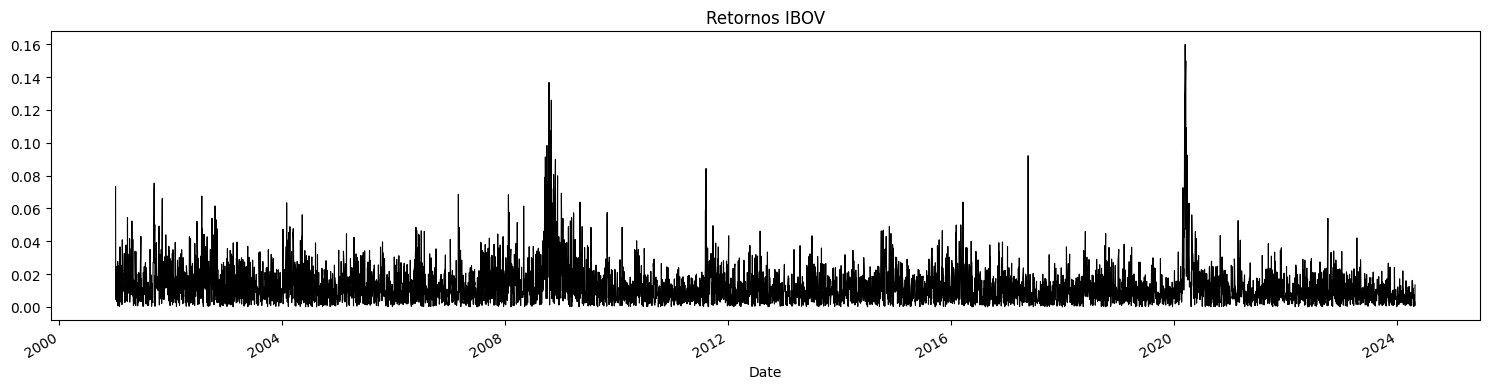

In [64]:
(ribov2**(1/2)).plot(figsize=(15,4), lw=.8, c='k')
plt.title('Retornos IBOV')
plt.tight_layout()

Novamente, é possível notar que quando a variância está alta ela tende a permanecer alta. Isso nos sugere a existência de **autocorrelação** na série dos retornos ao quadrado. Uma maneira de visualizar esta relação de correlação é construir o correlograma das autocorrelações das defasagens do $r_t^2$. 


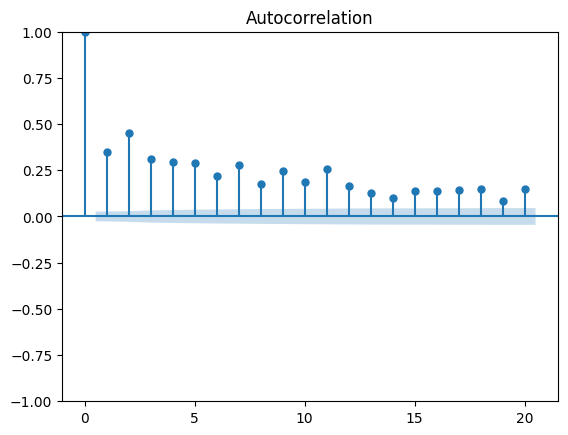

In [63]:
from statsmodels.graphics.tsaplots import plot_acf
_ = plot_acf(ribov2, lags= 20)

ACF do ret^2

ACF ret^2 e ACF sqrt ret^2 não são iguais, pois sao transformações não lineares

Outro fato característico da série de retornos é que ela é estacionária (fraca). Caso não se recorde, uma série é estacionária se a sua esperança e autocovariância forem invariantes no tempo (Segundo momento da distribuição também deve ser finito). Segue:

$\{y_t, t \in \Z\}$ é fracamente estacionário se 

$$E(y_t) = \mu $$
$$E|y_t|^2 < \infty \text{  or  } E(y_t - \mu)^2 < \infty$$
$$E(y_t - \mu)(y_{t-j} - \mu) = \gamma_j $$ 



Neste contexto, decorrem algumas propriedades ou fatos estilizados sobre os retornos financeiros:

1. A média dos retornos é (aprox.) 0
2. A variância dos retornos não é constante.
3. Existem *clusters de volatilidade* nos retornos de um ativo financeiro
4. Retornos são não autocorrelacionados
5. O quadrado dos retornos são correlacionados
6. A distribuição não condicional dos retornos tem caudas mais pesadas em relação a distribuição normal

ENDERS, W. Applied Econometric Time Series. 4th Edition. Hoboken, NJ:
John Wiley & Sons, 2015. Cap. 3.

HUDSON, R. and GREGORIU, A. Calculating and Comparing Security Returns is Harder than you Think: A Comparison between Logarithmic and Simple Returns (February 7, 2010). 